In [4]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

Import all the images needed --> convert it to a np.array of int16 because we need to do some operation with the abs()
or normalize the value from 0-1
or shift the value of 255 (or 1) using uint8

In [34]:
orig_img1 = cv2.imread('nose_left.png')
img1 = cv2.cvtColor(orig_img1, cv2.COLOR_BGR2RGB)

orig_img2 = cv2.imread('nose_right.png')
img2 = cv2.cvtColor(orig_img2, cv2.COLOR_BGR2RGB)

nose1 = cv2.imread('nose1.png')
# nose1 = cv2.cvtColor(nose1, cv2.COLOR_BGR2RGB)
nose1 = np.array(nose1, dtype=np.int16)

nose2 = cv2.imread('nose2.png')
# nose2 = cv2.cvtColor(nose2, cv2.COLOR_BGR2RGB)
nose2 = np.array(nose2, dtype=np.int16)

nose3 = cv2.imread('nose3.png')
# nose3 = cv2.cvtColor(nose3, cv2.COLOR_BGR2RGB)
nose3 = np.array(nose3, dtype=np.int16)

nose_left = cv2.imread('nose_left.png')
# nose_left = cv2.cvtColor(nose_left, cv2.COLOR_BGR2RGB)
nose_left = np.array(nose_left, dtype=np.int16)

nose_right = cv2.imread('nose_right.png')
#nose_right = cv2.cvtColor(nose_right, cv2.COLOR_BGR2RGB)
nose_right = np.array(nose_right, dtype=np.int16)

nose_span = cv2.imread('nose_span.png')
# nose_span = cv2.cvtColor(nose_span, cv2.COLOR_BGR2RGB)
nose_span = np.array(nose_span, dtype=np.int16)

tsukuba_right = cv2.imread('tsukuba_right.png')
tsukuba_right = cv2.cvtColor(tsukuba_right, cv2.COLOR_BGR2RGB)
tsukuba_right = np.array(tsukuba_right, dtype=np.int16)

tsukuba_left = cv2.imread('tsukuba_left.png')
tsukuba_left = cv2.cvtColor(tsukuba_left, cv2.COLOR_BGR2RGB)
tsukuba_left = np.array(tsukuba_left, dtype=np.int16)

Implement a function that takes two equal size images and calculates the sum of absolute differences. The two equal-sized images are nose_left.png (used as the template) and nose_right.png.

In [30]:
def sum_of_absolute_value(template, src2):
    r1,g1,b1 = cv2.split(template)
    r2,g2,b2, = cv2.split(src2)
    r,g,b = (0,0,0)
    for row in range(template.shape[0]):
        for col in range(template.shape[1]):
            r += abs(r1[row][col] - r2[row][col])
            g += abs(g1[row][col] - g2[row][col])
            b += abs(b1[row][col] - b2[row][col])
    return (r,g,b)

Using the function you just created, find which of the three images nose1.png, nose2.png, nose3.png gives the best match to nose_left.png?

In [7]:
print('Nose1 - Nose_left', sum_of_absolute_value(nose1, nose_left))
print('Nose2 - Nose_left', sum_of_absolute_value(nose2, nose_left))
print('Nose3 - Nose_left', sum_of_absolute_value(nose3, nose_left))

Nose1 - Nose_left 1361
Nose2 - Nose_left 119
Nose3 - Nose_left 1490


Since these images are rectified, we can approximately assume that a pixel found in row x in the left image also lives in row x in the right image. nose_span.png contains the entire row containing the nose of the sculpture. The height of the span is 7 - the same height as your template. Write a function that loops through the image from left to right and computes the correlation using your function from step 1 to find where in the span the nose is located

In [24]:
def row_correlation(template, src):
    min_value = -1
    min_index = -1
    for col in range(src.shape[1] - template.shape[0]):
        
        src_slicing = src_span[:, col : col + template.shape[0]]
        current_value = sum_of_absolute_value(template, src_slicing)
        
        if min_value == -1:
            min_value = current_value
            min_index = col
        else:
            if current_value < min_value:
                min_value = current_value
                min_index = col
    return (min_value, min_index)

Write a template matching function that iteratively takes a 7x7 subpart (numpy calls this slicing) of tsukuba_left.png and uses your function from step 3 to apply it to the corresponding row in tsukuba_right.png and stores the lowest/best matching disparity value for that template. Continue until all possible templates for a row has been used before moving down to the next row in the image.

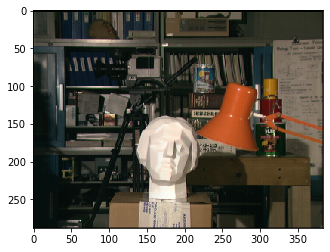

In [10]:
plt.imshow(tsukuba_left)

In [29]:
slicing = tsukuba_left[0 : 0 + 7, 0 : 0 + 7]
img2_span = tsukuba_right[0 : 0 + 7, :]
matched = row_correlation(slicing, img2_span)


(201, 0)


In [143]:
def sum_of_absolute_value(template, src2):
    r1,g1,b1 = cv2.split(template)
    r2,g2,b2, = cv2.split(src2)
    r,g,b = (0,0,0)
    for row in range(template.shape[0]):
        for col in range(template.shape[1]):
            r += abs(r1[row][col] - r2[row][col])
            g += abs(g1[row][col] - g2[row][col])
            b += abs(b1[row][col] - b2[row][col])
    return r+g+b

def row_correlation(template, src_span):
    min_value = -1
    min_index = -1
    for col in range(src_span.shape[1] - template.shape[0]):
        
        src_slicing = src_span[:, col : col + template.shape[0]]
        current_value = sum_of_absolute_value(template, src_slicing)
        
        if min_value == -1:
            min_value = current_value
            min_index = col
        else:
            if current_value < min_value:
                min_value = current_value
                min_index = col
    return (min_value, min_index)

def matching_function(img1, img2):
    
    matched = [[None for _ in range(img1.shape[1] - 6)] for _ in range(img1.shape[0] - 6)]
#     img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
#     img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
#     img1 = np.array(img1, dtype=np.int16)
#     img2 = np.array(img2, dtype=np.int16)
    
    for row in range(img1.shape[0]):
        
        img2_span = img2[row : row + 7, :]
        
        for col in range(img1.shape[1]):
            
            if row <= img1.shape[0] - 7 and col <= img1.shape[1] - 7:
                slicing = img1[row : row +7, col : col + 7]                
                matched[row][col] = row_correlation(slicing, img2_span)
                print(row, col, matched[row][col])
    
    return matched

In [137]:
matched = [[None for _ in range(tsukuba_left.shape[1] - 7)] for _ in range(tsukuba_left.shape[0] - 7)]
print(len(matched), len(matched[0]))
print(tsukuba_left.shape)

281 377
(288, 384, 3)


In [144]:
matched = matching_function(tsukuba_left, tsukuba_right)
print(matched)

0 0 (201, 0)
0 1 (336, 1)
0 2 (599, 1)
0 3 (490, 1)
0 4 (552, 1)
0 5 (554, 1)
0 6 (556, 1)
0 7 (594, 1)
0 8 (617, 1)
0 9 (617, 1)
0 10 (591, 1)
0 11 (577, 1)
0 12 (540, 1)
0 13 (693, 1)
0 14 (711, 1)
0 15 (834, 67)
0 16 (779, 66)
0 17 (711, 67)
0 18 (605, 66)
0 19 (521, 67)
0 20 (503, 66)
0 21 (498, 67)
0 22 (448, 1)
0 23 (424, 2)
0 24 (333, 3)
0 25 (305, 4)
0 26 (265, 5)
0 27 (239, 6)
0 28 (237, 7)
0 29 (148, 9)
0 30 (129, 10)
0 31 (110, 11)
0 32 (119, 12)
0 33 (113, 13)
0 34 (176, 14)
0 35 (273, 15)
0 36 (346, 16)
0 37 (403, 17)
0 38 (451, 18)
0 39 (524, 19)
0 40 (610, 20)
0 41 (576, 21)
0 42 (478, 22)
0 43 (427, 23)
0 44 (374, 24)
0 45 (401, 25)
0 46 (352, 26)
0 47 (283, 27)
0 48 (351, 28)
0 49 (456, 29)
0 50 (522, 30)
0 51 (521, 31)
0 52 (440, 32)
0 53 (577, 33)
0 54 (722, 34)
0 55 (659, 35)
0 56 (641, 36)
0 57 (588, 107)
0 58 (481, 108)
0 59 (324, 109)
0 60 (340, 110)
0 61 (519, 41)
0 62 (544, 43)
0 63 (531, 44)
0 64 (544, 45)
0 65 (456, 46)
0 66 (507, 47)
0 67 (612, 48)
0 68 (519

1 136 (390, 117)
1 137 (404, 118)
1 138 (366, 119)
1 139 (368, 120)
1 140 (353, 121)
1 141 (353, 122)
1 142 (309, 123)
1 143 (293, 124)
1 144 (315, 125)
1 145 (305, 126)
1 146 (318, 127)
1 147 (307, 128)
1 148 (347, 129)
1 149 (340, 130)
1 150 (376, 131)
1 151 (331, 132)
1 152 (342, 133)
1 153 (324, 134)
1 154 (395, 135)
1 155 (455, 136)
1 156 (493, 137)
1 157 (557, 138)
1 158 (553, 139)
1 159 (573, 140)
1 160 (930, 67)
1 161 (973, 141)
1 162 (968, 142)
1 163 (851, 143)
1 164 (873, 144)
1 165 (807, 145)
1 166 (884, 146)
1 167 (867, 147)
1 168 (797, 148)
1 169 (574, 150)
1 170 (764, 151)
1 171 (772, 152)
1 172 (766, 153)
1 173 (505, 154)
1 174 (490, 155)
1 175 (479, 156)
1 176 (445, 157)
1 177 (220, 158)
1 178 (163, 188)
1 179 (107, 161)
1 180 (123, 186)
1 181 (137, 181)
1 182 (339, 163)
1 183 (404, 164)
1 184 (427, 165)
1 185 (515, 166)
1 186 (618, 167)
1 187 (719, 168)
1 188 (786, 169)
1 189 (712, 170)
1 190 (689, 171)
1 191 (679, 172)
1 192 (706, 173)
1 193 (613, 174)
1 194 (509, 175

2 255 (511, 236)
2 256 (391, 237)
2 257 (404, 238)
2 258 (399, 239)
2 259 (371, 240)
2 260 (305, 241)
2 261 (290, 242)
2 262 (252, 243)
2 263 (210, 247)
2 264 (163, 246)
2 265 (154, 247)
2 266 (148, 246)
2 267 (146, 247)
2 268 (155, 248)
2 269 (208, 249)
2 270 (338, 251)
2 271 (346, 252)
2 272 (331, 253)
2 273 (365, 254)
2 274 (347, 255)
2 275 (380, 256)
2 276 (383, 257)
2 277 (279, 258)
2 278 (260, 260)
2 279 (260, 261)
2 280 (265, 262)
2 281 (264, 263)
2 282 (267, 264)
2 283 (269, 265)
2 284 (242, 266)
2 285 (185, 267)
2 286 (188, 268)
2 287 (174, 269)
2 288 (176, 270)
2 289 (183, 271)
2 290 (184, 272)
2 291 (180, 273)
2 292 (190, 274)
2 293 (228, 371)
2 294 (210, 370)
2 295 (250, 275)
2 296 (226, 276)
2 297 (212, 277)
2 298 (208, 278)
2 299 (188, 279)
2 300 (170, 280)
2 301 (168, 281)
2 302 (166, 282)
2 303 (179, 283)
2 304 (189, 284)
2 305 (196, 285)
2 306 (202, 286)
2 307 (198, 331)
2 308 (166, 322)
2 309 (150, 321)
2 310 (135, 322)
2 311 (142, 323)
2 312 (142, 310)
2 313 (142, 31

3 374 (168, 368)
3 375 (163, 369)
3 376 (175, 374)
3 377 (515, 375)
4 0 (335, 0)
4 1 (536, 1)
4 2 (700, 296)
4 3 (691, 288)
4 4 (541, 298)
4 5 (510, 298)
4 6 (490, 302)
4 7 (506, 297)
4 8 (520, 300)
4 9 (562, 291)
4 10 (584, 292)
4 11 (605, 293)
4 12 (634, 292)
4 13 (863, 293)
4 14 (1065, 296)
4 15 (1252, 292)
4 16 (1262, 66)
4 17 (1120, 66)
4 18 (915, 64)
4 19 (842, 65)
4 20 (836, 66)
4 21 (871, 67)
4 22 (691, 1)
4 23 (660, 2)
4 24 (509, 3)
4 25 (461, 4)
4 26 (392, 5)
4 27 (356, 6)
4 28 (353, 7)
4 29 (267, 9)
4 30 (238, 10)
4 31 (185, 11)
4 32 (192, 12)
4 33 (182, 13)
4 34 (280, 14)
4 35 (480, 15)
4 36 (528, 16)
4 37 (565, 17)
4 38 (561, 18)
4 39 (680, 19)
4 40 (875, 20)
4 41 (849, 21)
4 42 (648, 22)
4 43 (612, 23)
4 44 (576, 24)
4 45 (737, 25)
4 46 (642, 26)
4 47 (475, 27)
4 48 (557, 28)
4 49 (820, 29)
4 50 (923, 30)
4 51 (974, 31)
4 52 (811, 32)
4 53 (1037, 33)
4 54 (1363, 34)
4 55 (1015, 36)
4 56 (1060, 37)
4 57 (813, 107)
4 58 (735, 108)
4 59 (550, 109)
4 60 (547, 110)
4 61 (768, 

5 125 (318, 106)
5 126 (269, 107)
5 127 (256, 108)
5 128 (225, 109)
5 129 (221, 110)
5 130 (246, 111)
5 131 (284, 112)
5 132 (275, 113)
5 133 (293, 114)
5 134 (318, 115)
5 135 (460, 116)
5 136 (468, 117)
5 137 (463, 118)
5 138 (445, 119)
5 139 (461, 120)
5 140 (469, 121)
5 141 (457, 122)
5 142 (376, 123)
5 143 (363, 124)
5 144 (439, 125)
5 145 (426, 126)
5 146 (429, 127)
5 147 (418, 128)
5 148 (445, 129)
5 149 (449, 130)
5 150 (499, 131)
5 151 (388, 132)
5 152 (404, 133)
5 153 (379, 134)
5 154 (470, 135)
5 155 (554, 136)
5 156 (539, 137)
5 157 (635, 138)
5 158 (645, 139)
5 159 (647, 140)
5 160 (1274, 67)
5 161 (1248, 141)
5 162 (1225, 142)
5 163 (1216, 143)
5 164 (1303, 144)
5 165 (1214, 145)
5 166 (1351, 146)
5 167 (1378, 147)
5 168 (1302, 148)
5 169 (919, 150)
5 170 (1063, 151)
5 171 (1093, 152)
5 172 (1087, 153)
5 173 (655, 154)
5 174 (598, 155)
5 175 (555, 156)
5 176 (472, 157)
5 177 (250, 158)
5 178 (221, 159)
5 179 (173, 161)
5 180 (194, 160)
5 181 (213, 161)
5 182 (344, 163)
5 1

KeyboardInterrupt: 